In [4]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
labels=["Speech","Music","Silence","Siren","Vehicle","Wind"]

Using cuda device


In [5]:
#これを保存した
mymodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.25),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict=get_dataloader_dict(labels,datatype="train")



vggish/embedding:0
C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347


Epoch 1/50
train Loss: 1.742211 Acc: 0.351307
valid Loss: 1.700470 Acc: 0.482699
Epoch 2/50
train Loss: 1.694052 Acc: 0.497178
valid Loss: 1.663877 Acc: 0.529412
Epoch 3/50
train Loss: 1.674462 Acc: 0.527778
valid Loss: 1.645060 Acc: 0.550173
Epoch 4/50
train Loss: 1.662849 Acc: 0.542038
valid Loss: 1.632961 Acc: 0.572664
Epoch 5/50
train Loss: 1.654741 Acc: 0.567291
valid Loss: 1.624124 Acc: 0.581315
Epoch 6/50
train Loss: 1.649359 Acc: 0.581105
valid Loss: 1.617367 Acc: 0.595156
Epoch 7/50
train Loss: 1.644748 Acc: 0.596554
valid Loss: 1.611794 Acc: 0.601499
Epoch 8/50
train Loss: 1.640619 Acc: 0.604130
valid Loss: 1.607206 Acc: 0.611880
Epoch 9/50
train Loss: 1.638020 Acc: 0.613636
valid Loss: 1.603170 Acc: 0.613033
Epoch 10/50
train Loss: 1.634429 Acc: 0.617647
valid Loss: 1.599724 Acc: 0.617070
Epoch 11/50
train Loss: 1.632391 Acc: 0.627154
valid Loss: 1.596565 Acc: 0.621107
Epoch 12/50
train Loss: 1.630118 Acc: 0.639632
valid Loss: 1.593683 Acc: 0.651096
Epoch 13/50
train Loss: 1

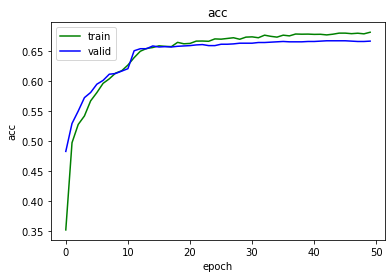

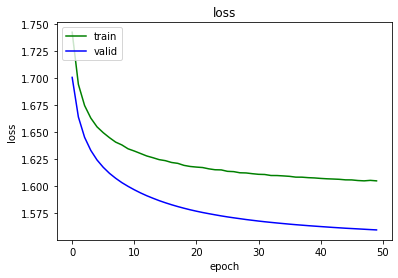

In [6]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
mymodel.graph()

In [7]:
#hozon
import joblib
#joblib.dump(mymodel,"tyuukannyou.jb", compress=3)
#torch.save(model.to('cpu').state_dict(), 'model.pth')

['tyuukannyou.jb']

In [8]:
#よみこみ
import joblib
loadmodel=joblib.load("tyuukannyou.jb")

In [17]:
import numpy as np

dataloader_dict=get_dataloader_dict(labels,datatype="eval")
def eval(tr,dataloader_dict,labels):
    model=tr.model
    inputs,la = iter(dataloader_dict["train"]).__next__()
    model.eval()

    output = model(inputs)
    for h in range(len(output)):
        print("模範解答",labels[la[h].item()])
        ans=[[labels[i],output[h][i].item()] for i in range(len(labels))]
        ans.sort(key=lambda x: x[1],reverse=True)
        [print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
        print("----------------")

def eval2(tr,dataloader_dict,labels):
    kondou=np.zeros((len(labels),len(labels)))
    model=tr.model
    acc=0
    count=0.0
    for inputs,la in dataloader_dict["train"]:

        model.eval()

        output = model(inputs)
        for h in range(len(output)):
            #print("模範解答",labels[la[h].item()])
            ans=[[i,output[h][i].item()] for i in range(len(labels))]
            ans.sort(key=lambda x: x[1],reverse=True)
            acc+=1 if (ans[0][0]==la[h])else 0
            count+=1
            #せいかい、しゅつりょく
            kondou[la[h]][ans[0][0]]+=1
            #[print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
            #print("----------------")
    print("正解数/入力数:{}/{:.0f}".format(acc,count))
    print("正解率:{:.3f}".format(acc/count))
    return kondou
#eval(mymodel,dataloader_dict,labels)        
kondou=eval2(loadmodel,dataloader_dict,labels)


C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：75
valid用データの数：42
正解数/入力数:479/743
正解率:0.645


In [6]:
eval(mymodel,dataloader_dict,labels)

模範解答 Speech
Speech :0.52110
Siren  :0.13776
Music  :0.10858
Wind   :0.08708
Vehicle:0.08445
Silence:0.06103
----------------
模範解答 Wind
Siren  :0.29005
Wind   :0.28584
Vehicle:0.17389
Speech :0.13511
Silence:0.06387
Music  :0.05124
----------------
模範解答 Siren
Siren  :0.54936
Music  :0.12463
Speech :0.11021
Wind   :0.07641
Vehicle:0.07503
Silence:0.06436
----------------
模範解答 Speech
Speech :0.37006
Music  :0.20474
Siren  :0.19471
Vehicle:0.09380
Wind   :0.08514
Silence:0.05155
----------------
模範解答 Wind
Wind   :0.43472
Siren  :0.17116
Vehicle:0.14075
Speech :0.11503
Silence:0.07183
Music  :0.06651
----------------
模範解答 Siren
Siren  :0.66297
Speech :0.09607
Music  :0.06883
Vehicle:0.06542
Silence:0.05871
Wind   :0.04799
----------------
模範解答 Vehicle
Siren  :0.23752
Vehicle:0.22960
Speech :0.20765
Wind   :0.17584
Silence:0.07702
Music  :0.07237
----------------
模範解答 Music
Wind   :0.37418
Speech :0.20102
Siren  :0.15105
Vehicle:0.13385
Silence:0.07698
Music  :0.06292
----------------
模範解答 V

In [20]:
import pandas as pd
df = pd.DataFrame(kondou)
df.index=labels
df.columns=labels
df.to_csv('tyukan.csv')
df

,Speech,Music,Silence,Siren,Vehicle,Wind
Speech,61.0,31.0,0.0,6.0,21.0,5.0
Music,19.0,96.0,0.0,2.0,10.0,7.0
Silence,21.0,29.0,52.0,6.0,5.0,7.0
Siren,0.0,12.0,0.0,71.0,16.0,1.0
Vehicle,5.0,0.0,0.0,6.0,129.0,7.0
Wind,6.0,0.0,5.0,0.0,37.0,70.0
